In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import find_peaks

In [2]:
base_path = '/Users/bordonis/ResearchActivities/Perovskite/XRD/August2024/'
file_path_csSC67_B = os.path.join(base_path,'SC67_B/SC67-B_t2t.csv')
file_path_csSC67_A = os.path.join(base_path,'SC67_A/SC67-A_t2t.csv')


df_SC67_B = pd.read_csv(file_path_csSC67_B, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_SC67_B.head()

df_SC67_A = pd.read_csv(file_path_csSC67_A, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_SC67_A.head()


,2theta,counts
0,7.00,0.000000
1,7.01,0.000000
2,7.02,3.193791
3,7.03,0.000000
4,7.04,0.000000


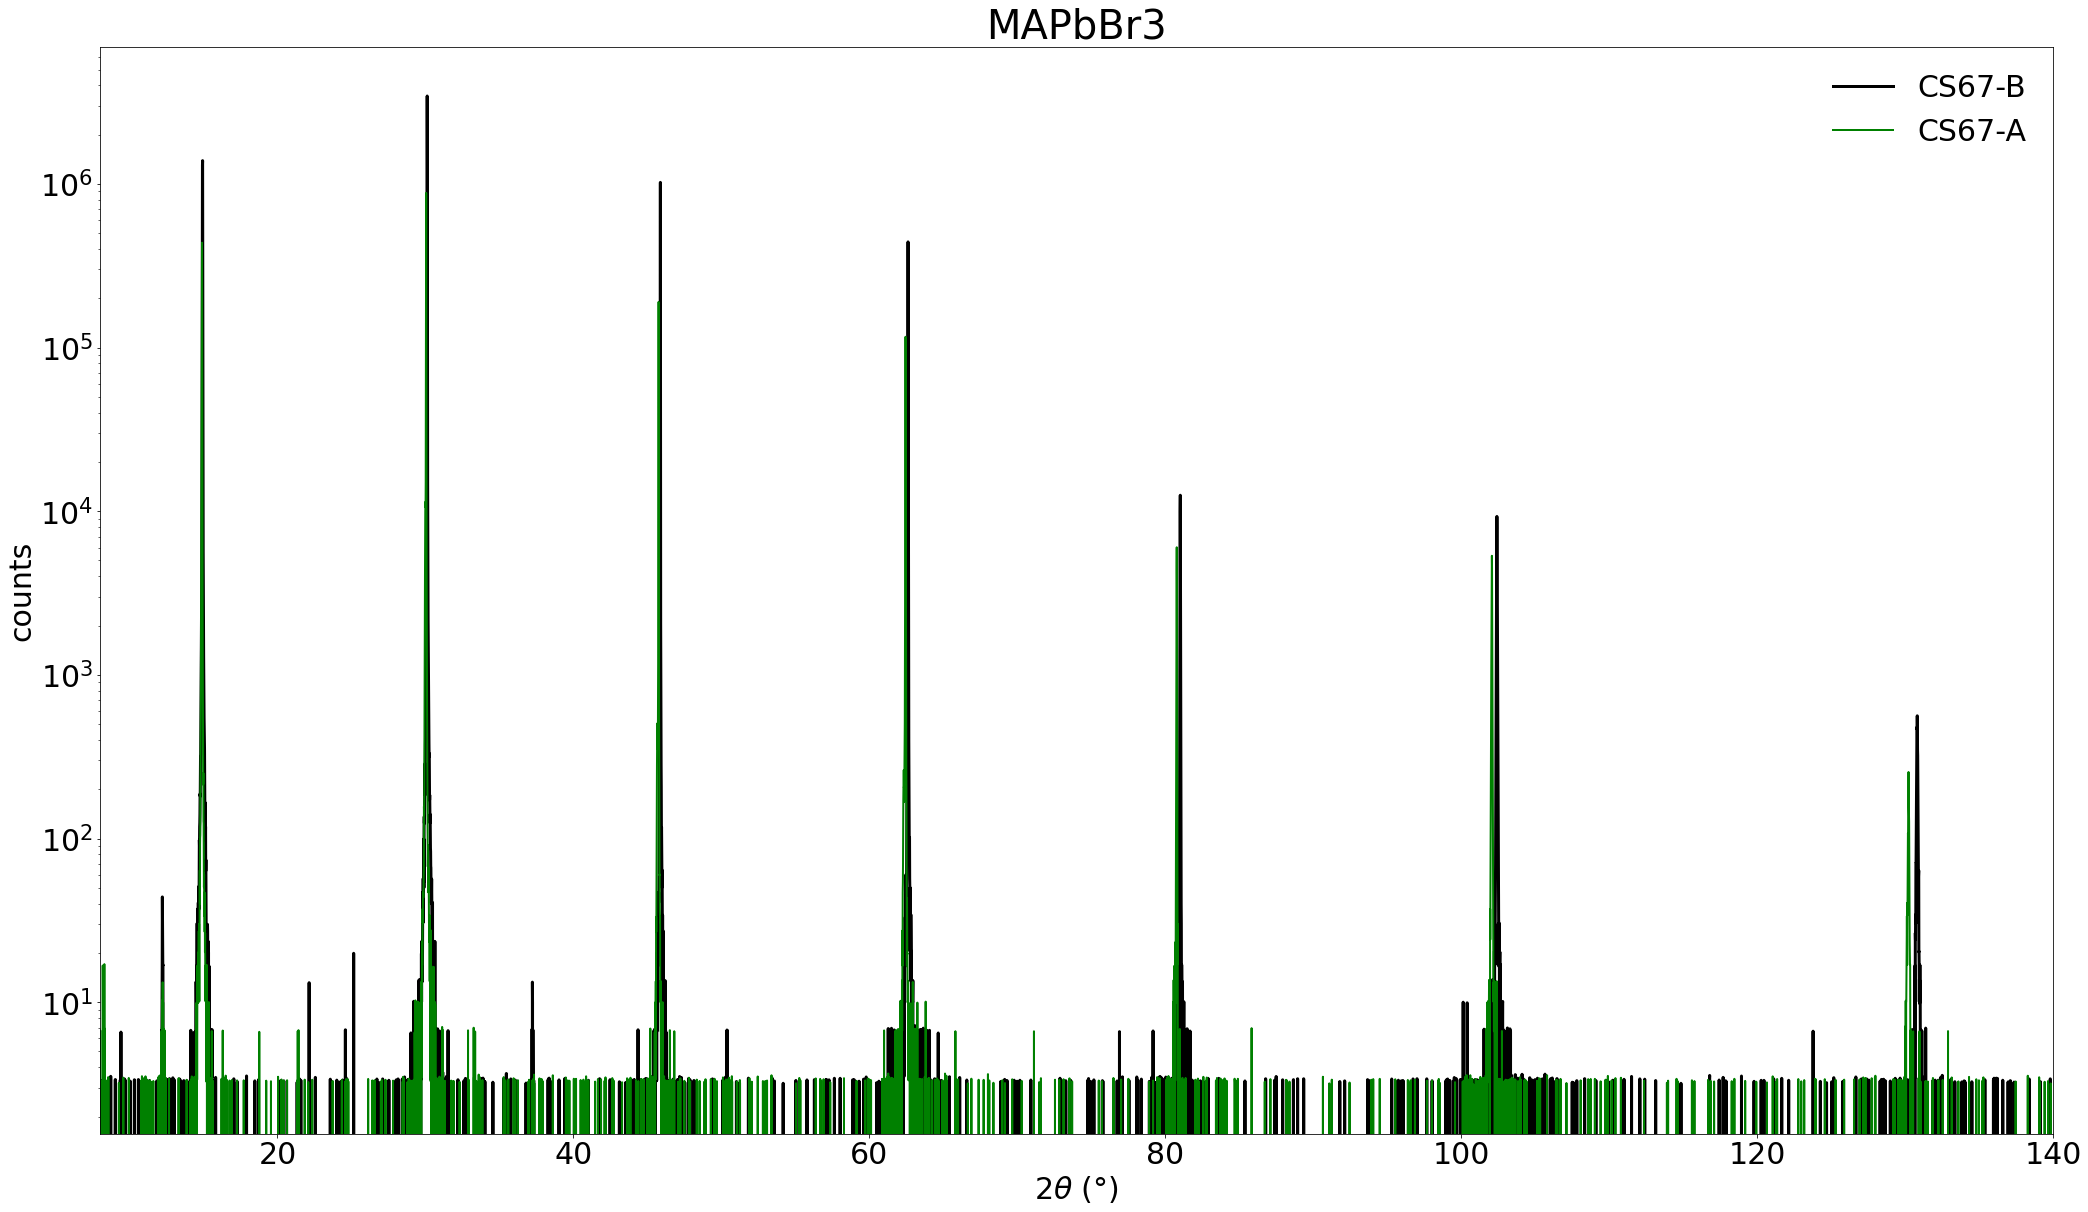

In [8]:
fig = plt.figure(figsize=(35,20))
ax1 = fig.add_subplot(111)
ax1.set_xlabel("2$\\theta$ ($\degree)$", fontsize=30)
ax1.tick_params(axis='x', labelsize=30)
ax1.set_ylabel("counts", fontsize=30)
ax1.tick_params(axis='y', labelsize=30)
ax1.set_title("MAPbBr3", fontsize=40)
ax1.set_yscale('log')
#ax1.grid(True)
ax1.plot(df_SC67_B['2theta'], df_SC67_B['counts'], label='CS67-B', c='black', linewidth=3)
ax1.plot(df_SC67_A['2theta'], df_SC67_A['counts'], label='CS67-A', c='green', linewidth=2)
ax1.set_xlim(8, 140)
ax1.legend(fontsize="30", frameon=False)

plt.show()




In [55]:
def myfindpeak(df):
    _df = df
    peaks, _ = find_peaks(_df['counts'], threshold=65, prominence=[60]) 
    peak_x = _df['2theta'].iloc[peaks]
    peak_y = _df['counts'].iloc[peaks]
    num_peaks = len(peaks_SC67_B)

    return peak_x, peak_y, num_peaks

In [17]:
peaks_SC67_B, _ = find_peaks(df_SC67_B['counts'], threshold=65, prominence=[60]) 
peak_x = df_SC67_B['2theta'].iloc[peaks_SC67_B]
peak_y = df_SC67_B['counts'].iloc[peaks_SC67_B]
num_peaks = len(peaks_SC67_B)

print(peak_x)
print(peak_y)

694       14.940000
2197      29.969999
2212      30.120001
3788      45.880001
5462      62.619999
7302      81.019997
9442     102.419998
12283    130.830002
Name: 2theta, dtype: float64
694      1.387837e+06
2197     2.868204e+02
2212     3.445043e+06
3788     1.022043e+06
5462     4.423859e+05
7302     1.252378e+04
9442     9.293181e+03
12283    5.621008e+02
Name: counts, dtype: float64


In [19]:
peaks_SC67_A, _A = find_peaks(df_SC67_A['counts'],  prominence=60) 
peak_x_SC67_A =df_SC67_A['2theta'].iloc[peaks_SC67_A]
peak_y_SC67_A = df_SC67_A['counts'].iloc[peaks_SC67_A]
num_peaks = len(peaks_SC67_A)

print(peak_x_SC67_A)
print(peak_y_SC67_A)

790       14.900000
2300      30.000000
2305      30.049999
3867      45.669998
3876      45.759998
5533      62.330002
5545      62.450001
7378      80.779999
9508     102.080002
12324    130.240005
Name: 2theta, dtype: float64
790      437216.770833
2300      11406.220703
2305     881490.104167
3867        505.086924
3876     190071.992188
5533        262.116877
5545     116384.049479
7378       6020.428467
9508       5341.953939
12324       254.950867
Name: counts, dtype: float64


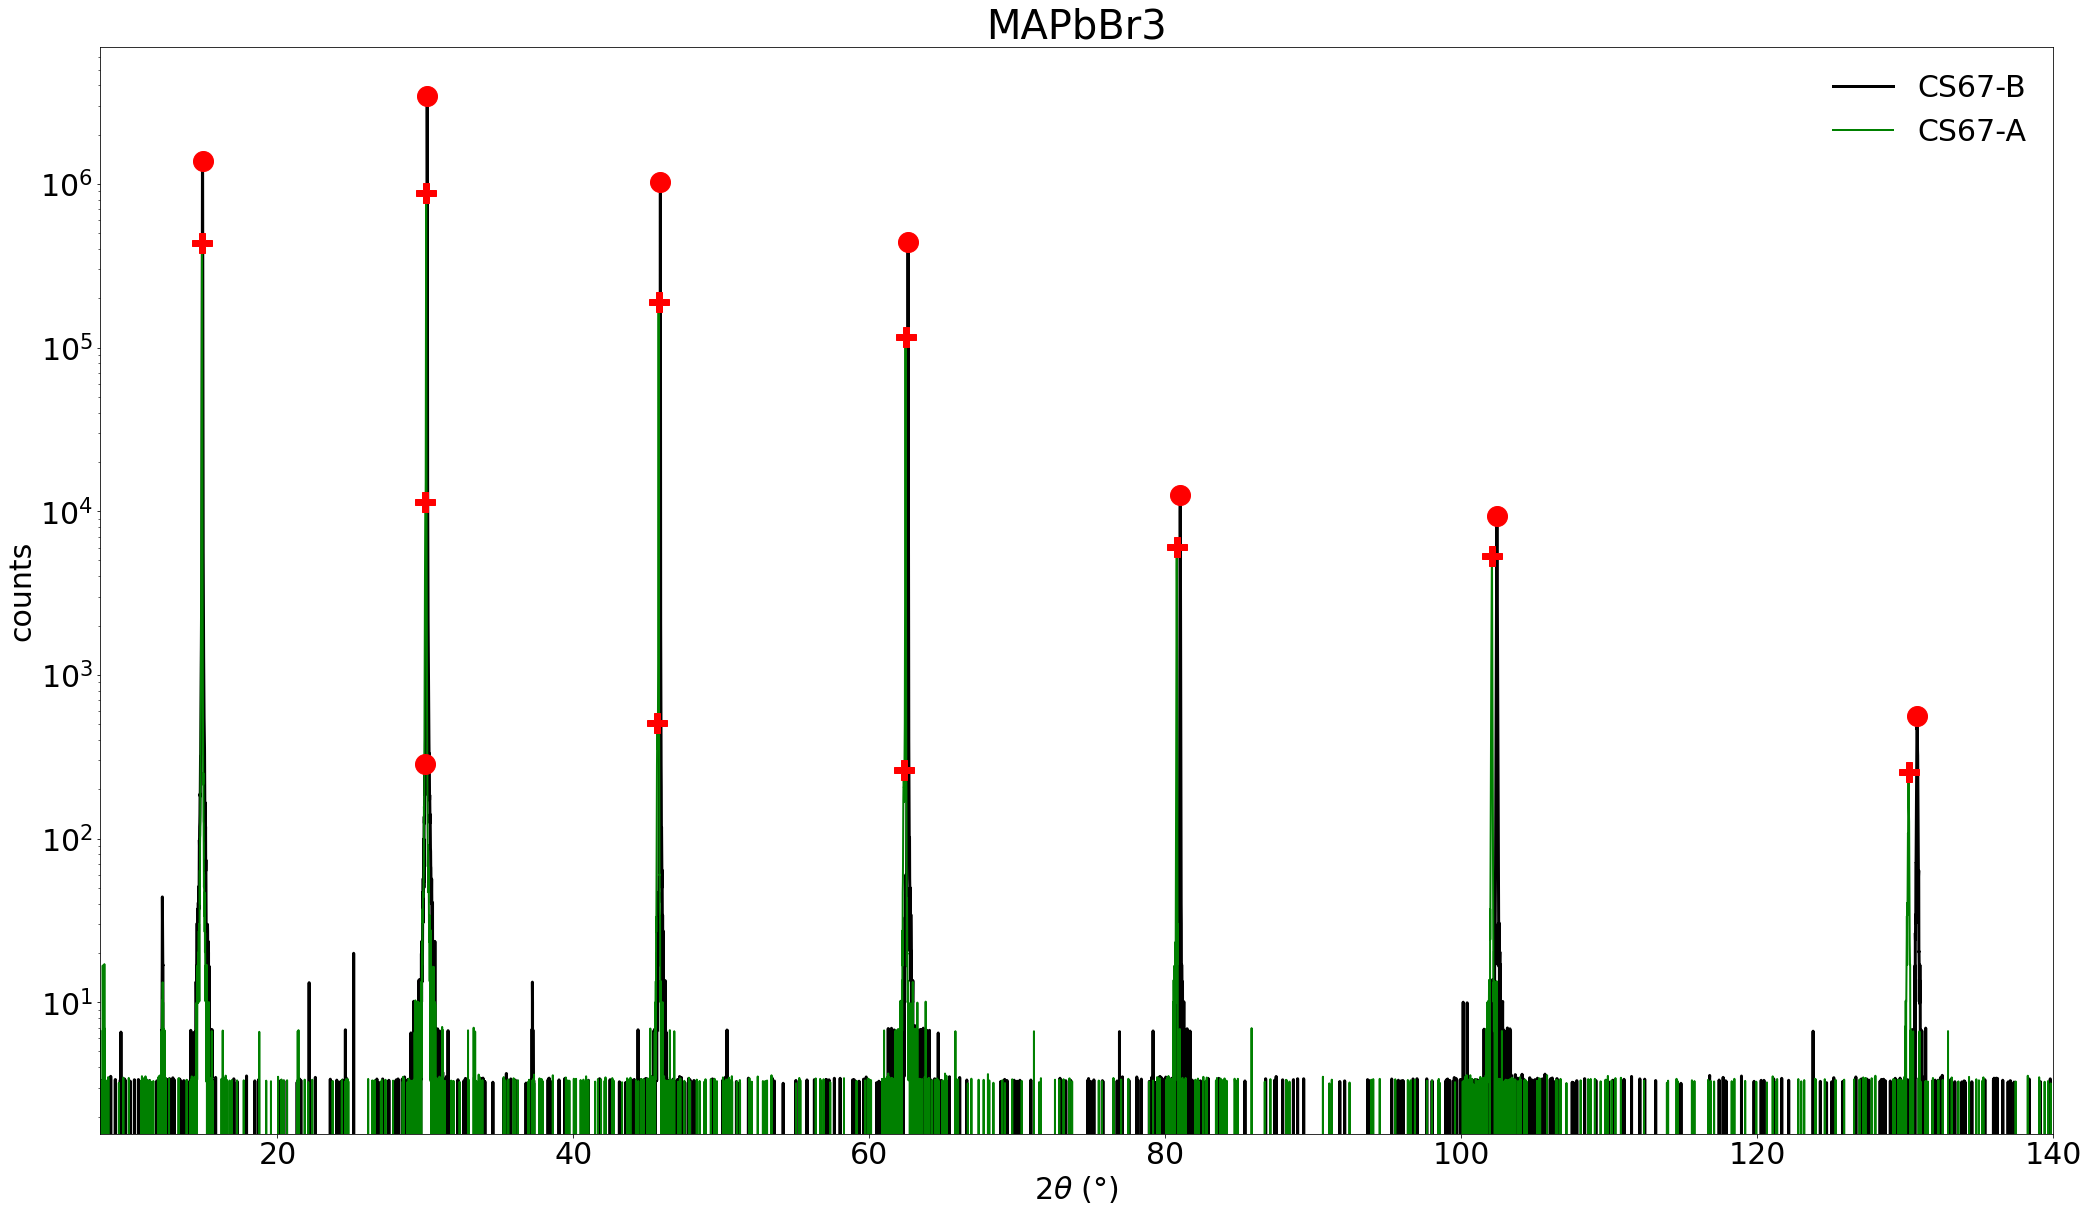

In [20]:
fig = plt.figure(figsize=(35,20))
ax1 = fig.add_subplot(111)
ax1.set_xlabel("2$\\theta$ ($\degree)$", fontsize=30)
ax1.tick_params(axis='x', labelsize=30)
ax1.set_ylabel("counts", fontsize=30)
ax1.tick_params(axis='y', labelsize=30)
ax1.set_title("MAPbBr3", fontsize=40)
ax1.set_yscale('log')

ax1.plot(df_SC67_B['2theta'], df_SC67_B['counts'], label='CS67-B', c='black', linewidth=3)
ax1.plot(df_SC67_A['2theta'], df_SC67_A['counts'], label='CS67-A', c='green', linewidth=2)

for i, peak in enumerate(peaks_SC67_B):
    ax1.plot(peak_x.iloc[i], peak_y.iloc[i], 'ro', markersize=20)
ax1.set_xlim(8, 140)
ax1.legend(fontsize="30", frameon=False)

for i, peak in enumerate(peaks_SC67_A):
    ax1.plot(peak_x_SC67_A.iloc[i], peak_y_SC67_A.iloc[i], 'rP', markersize=20)

plt.show()

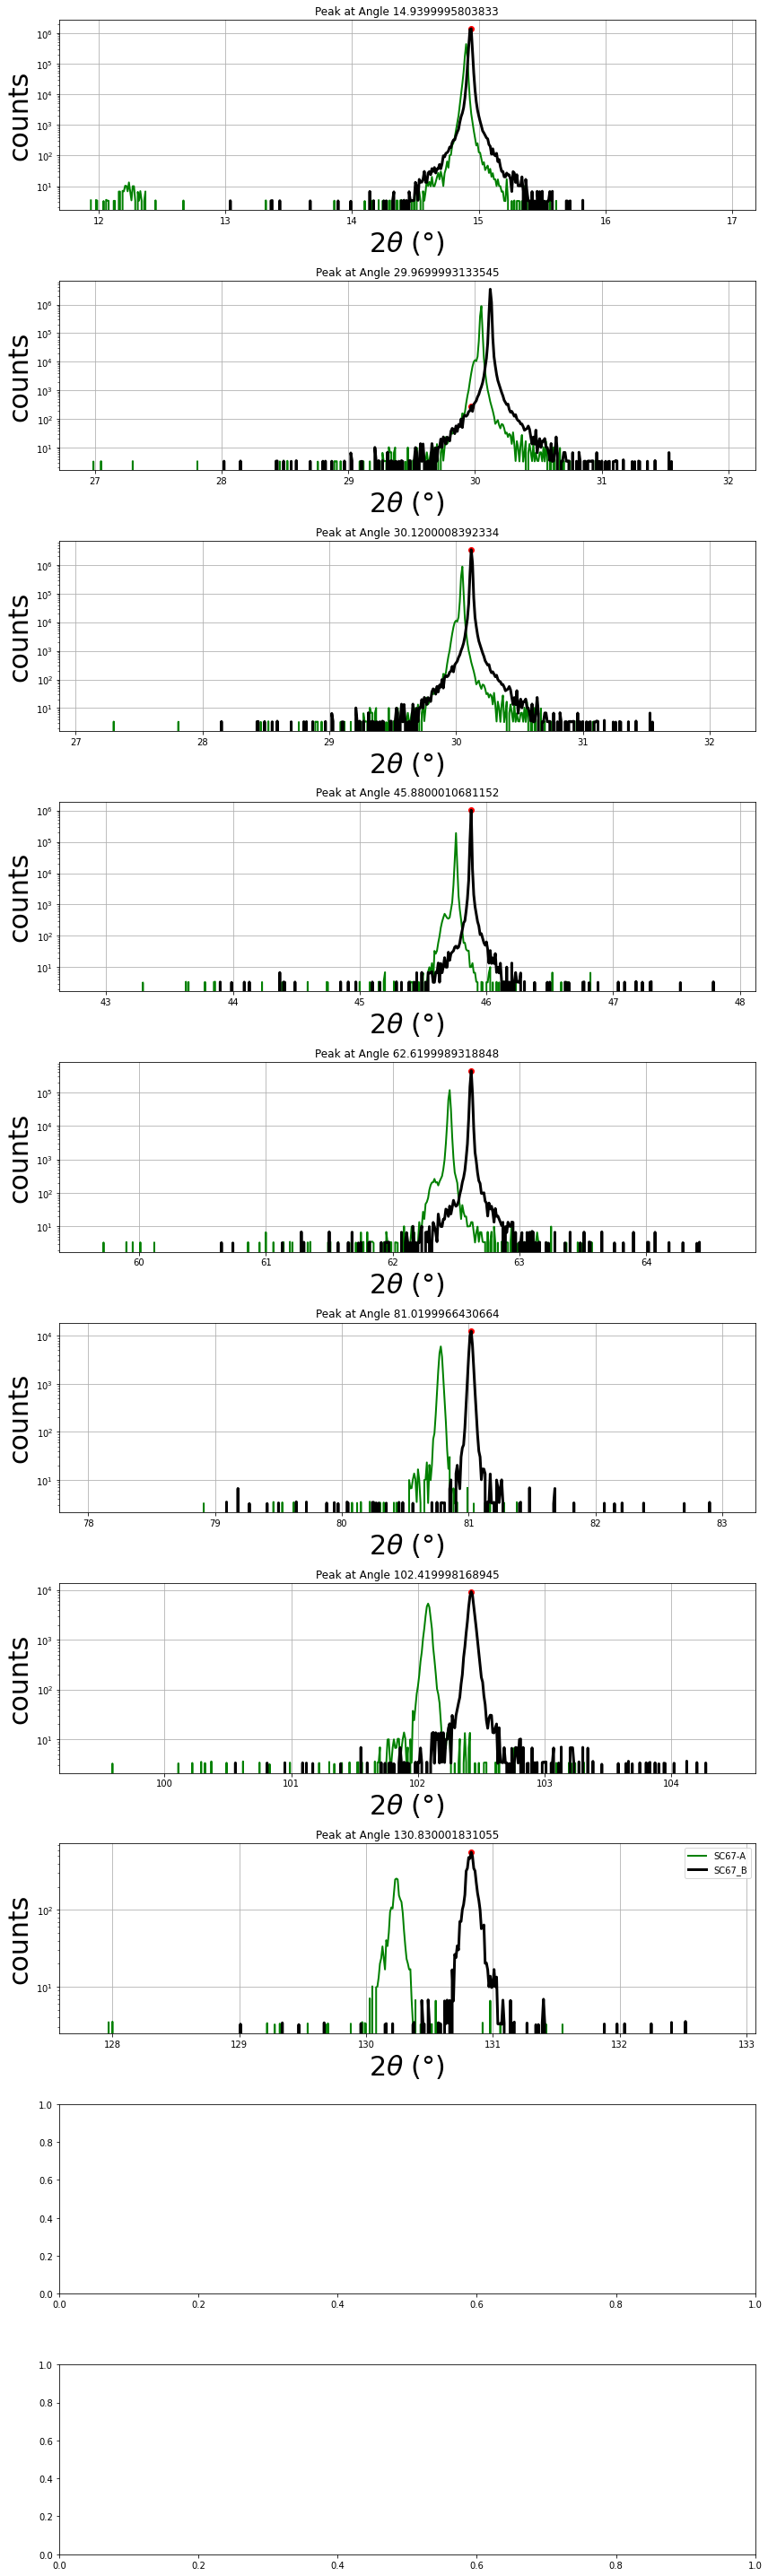

In [48]:
fig, axs = plt.subplots( num_peaks, 1, figsize=(12, num_peaks * 4))
#fig, axs = plt.subplots( 1, num_peaks, figsize=(30,15))

if num_peaks == 1:
    axs = [axs]

for i, peak in enumerate(peaks_SC67_B):
    ax = axs[i]
    window = 200
    start = max(0, peak - window)
    end = min(len(df_SC67_B['2theta']), peak + window)

    ax.set_yscale('log')
    #print(df_SC67_B['counts'][start:end])
    ax.plot(peak_x.iloc[i], peak_y.iloc[i], 'ro')
    ax.set_xlabel("2$\\theta$ ($\degree)$", fontsize=30)
    ax.set_ylabel("counts", fontsize=30)
    ax.grid(True)
    ax.set_title(f"Peak at Angle {peak_x.iloc[i]}") 
    ax.plot(df_SC67_A['2theta'][start:end], df_SC67_A['counts'][start:end], label='SC67-A', c='green', linewidth=2)
    ax.plot(df_SC67_B['2theta'][start:end], df_SC67_B['counts'][start:end], label='SC67_B', c='black', linewidth=3)
    

#for i_a, peak_a in enumerate(peaks_SC67_A):
#    ax = axs[i_a]
#   print('start', start)
#    print('end', end)
#    print(peak_a)
#    if peak_x_SC67_A.iloc[i_a] in range(start,end) :
#        print('peak', peak_x_SC67_A.iloc[i_a])
#        print('range = [', start, ']', end )
#        ax.plot(peak_x_SC67_A.iloc[i_a], peak_y_SC67_A.iloc[i_a], 'rP')
ax.legend()

#for i, peak in enumerate(peaks_SC67_A):
#    ax = axs[i]
#    ax.plot(peak_x_SC67_A.iloc[i], peak_y_SC67_A.iloc[i], 'rP')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(50,15))
ax1 = fig.add_subplot(171)
ax1.set_xlabel("2$\\theta$ ($\degree)$", fontsize=30)
ax1.tick_params(axis='x', labelsize=30)
ax1.set_ylabel("counts", fontsize=30)
ax1.tick_params(axis='y', labelsize=30)
ax1.set_title("MAPbBr3", fontsize=40)
ax1.set_yscale('log')
#ax1.grid(True)
ax1.plot(df_SC67_B['2theta'], df_SC67_B['counts'], label='CS67-B', c='black', linewidth=3)
ax1.plot(df_SC67_A['2theta'], df_SC67_A['counts'], label='CS67-A', c='green', linewidth=2)
ax1.set_xlim(10, 20)
ax1.legend(fontsize="30", frameon=False)



ax1 = fig.add_subplot(172)
ax1.set_xlabel("2$\\theta$ ($\degree)$", fontsize=30)
ax1.tick_params(axis='x', labelsize=30)
ax1.set_ylabel("counts", fontsize=30)
ax1.tick_params(axis='y', labelsize=30)
ax1.set_title("MAPbBr3", fontsize=40)
ax1.set_yscale('log')
#ax1.grid(True)
ax1.plot(df_SC67_B['2theta'], df_SC67_B['counts'], label='CS67-B', c='black', linewidth=3)
ax1.plot(df_SC67_A['2theta'], df_SC67_A['counts'], label='CS67-A', c='green', linewidth=2)
ax1.set_xlim(25, 35)
ax1.legend(fontsize="30", frameon=False)

ax1 = fig.add_subplot(173)
ax1.set_xlabel("2$\\theta$ ($\degree)$", fontsize=30)
ax1.tick_params(axis='x', labelsize=30)
ax1.set_ylabel("counts", fontsize=30)
ax1.tick_params(axis='y', labelsize=30)
ax1.set_title("MAPbBr3", fontsize=40)
ax1.set_yscale('log')
ax1.plot(df_SC67_B['2theta'], df_SC67_B['counts'], label='CS67-B', c='black', linewidth=3)
ax1.plot(df_SC67_A['2theta'], df_SC67_A['counts'], label='CS67-A', c='green', linewidth=2)
ax1.set_xlim(40, 50)


ax4=fig.add_subplot(174)
ax4=ax1
ax4.set_xlim(55, 65)

In [49]:
file_path_CS104_A = os.path.join(base_path,'CS104_A/CS104-A_t2t.csv')
file_path_CS106_A = os.path.join(base_path,'CS106_A/CS106-A_t2t.csv')


df_CS104_A = pd.read_csv(file_path_CS104_A, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_CS104_A.head()

df_CS106_A = pd.read_csv(file_path_CS106_A, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_CS106_A.head()


,2theta,counts
0,7.00,0.0
1,7.01,0.0
2,7.02,0.0
3,7.03,0.0
4,7.04,0.0


Search for peaks in the first MAPbBr3 crystal

In [61]:
#search for peaks in the first crystal
peak_x_CS104_A, peak_y_CS104_A, n_peaks_CS104_A = myfindpeak(df_CS104_A)

#search for peaks in the second crystal
peak_x_CS106_A, peak_y_CS106_A, n_peaks_CS106_A = myfindpeak(df_CS106_A)

#print what has been found: 

print('\n\n ----- CS104-A ---- ')

print('num of peaks found', n_peaks_CS104_A)
print('peaks are:' )

for x, y in zip(peak_x_CS104_A, peak_y_CS104_A):
    print('x ', x , ';  y ', y )


print('\n\n ----- CS106-A ---- ')

print('num of peaks found ', n_peaks_CS106_A)
print('peaks are:' )

for x, y in zip(peak_x_CS106_A, peak_y_CS106_A):
    print('x ', x , ';  y ', y )



 ----- CS104-A ---- 
num of peaks found 8
peaks are:
x  15.0600004196167 ;  y  1913.65030924479
x  15.2200002670288 ;  y  33691.8489583333
x  30.3799991607666 ;  y  7281.62353515625
x  30.7000007629395 ;  y  174971.888020833
x  46.7799987792969 ;  y  537.439727783203
x  63.9199981689453 ;  y  1969.84985351563


 ----- CS106-A ---- 
num of peaks found  8
peaks are:
x  15.0600004196167 ;  y  5233.30078125
x  15.2200002670288 ;  y  6368.36222330729
x  30.3799991607666 ;  y  93695.5924479167
x  30.7000007629395 ;  y  51544.51171875
x  46.2799987792969 ;  y  937.668660481771
x  46.7900009155273 ;  y  664.322306315104
x  63.2000007629395 ;  y  4754.70865885417
x  63.9300003051758 ;  y  5347.39705403646


NameError: name 'peaks_CS104_A' is not defined

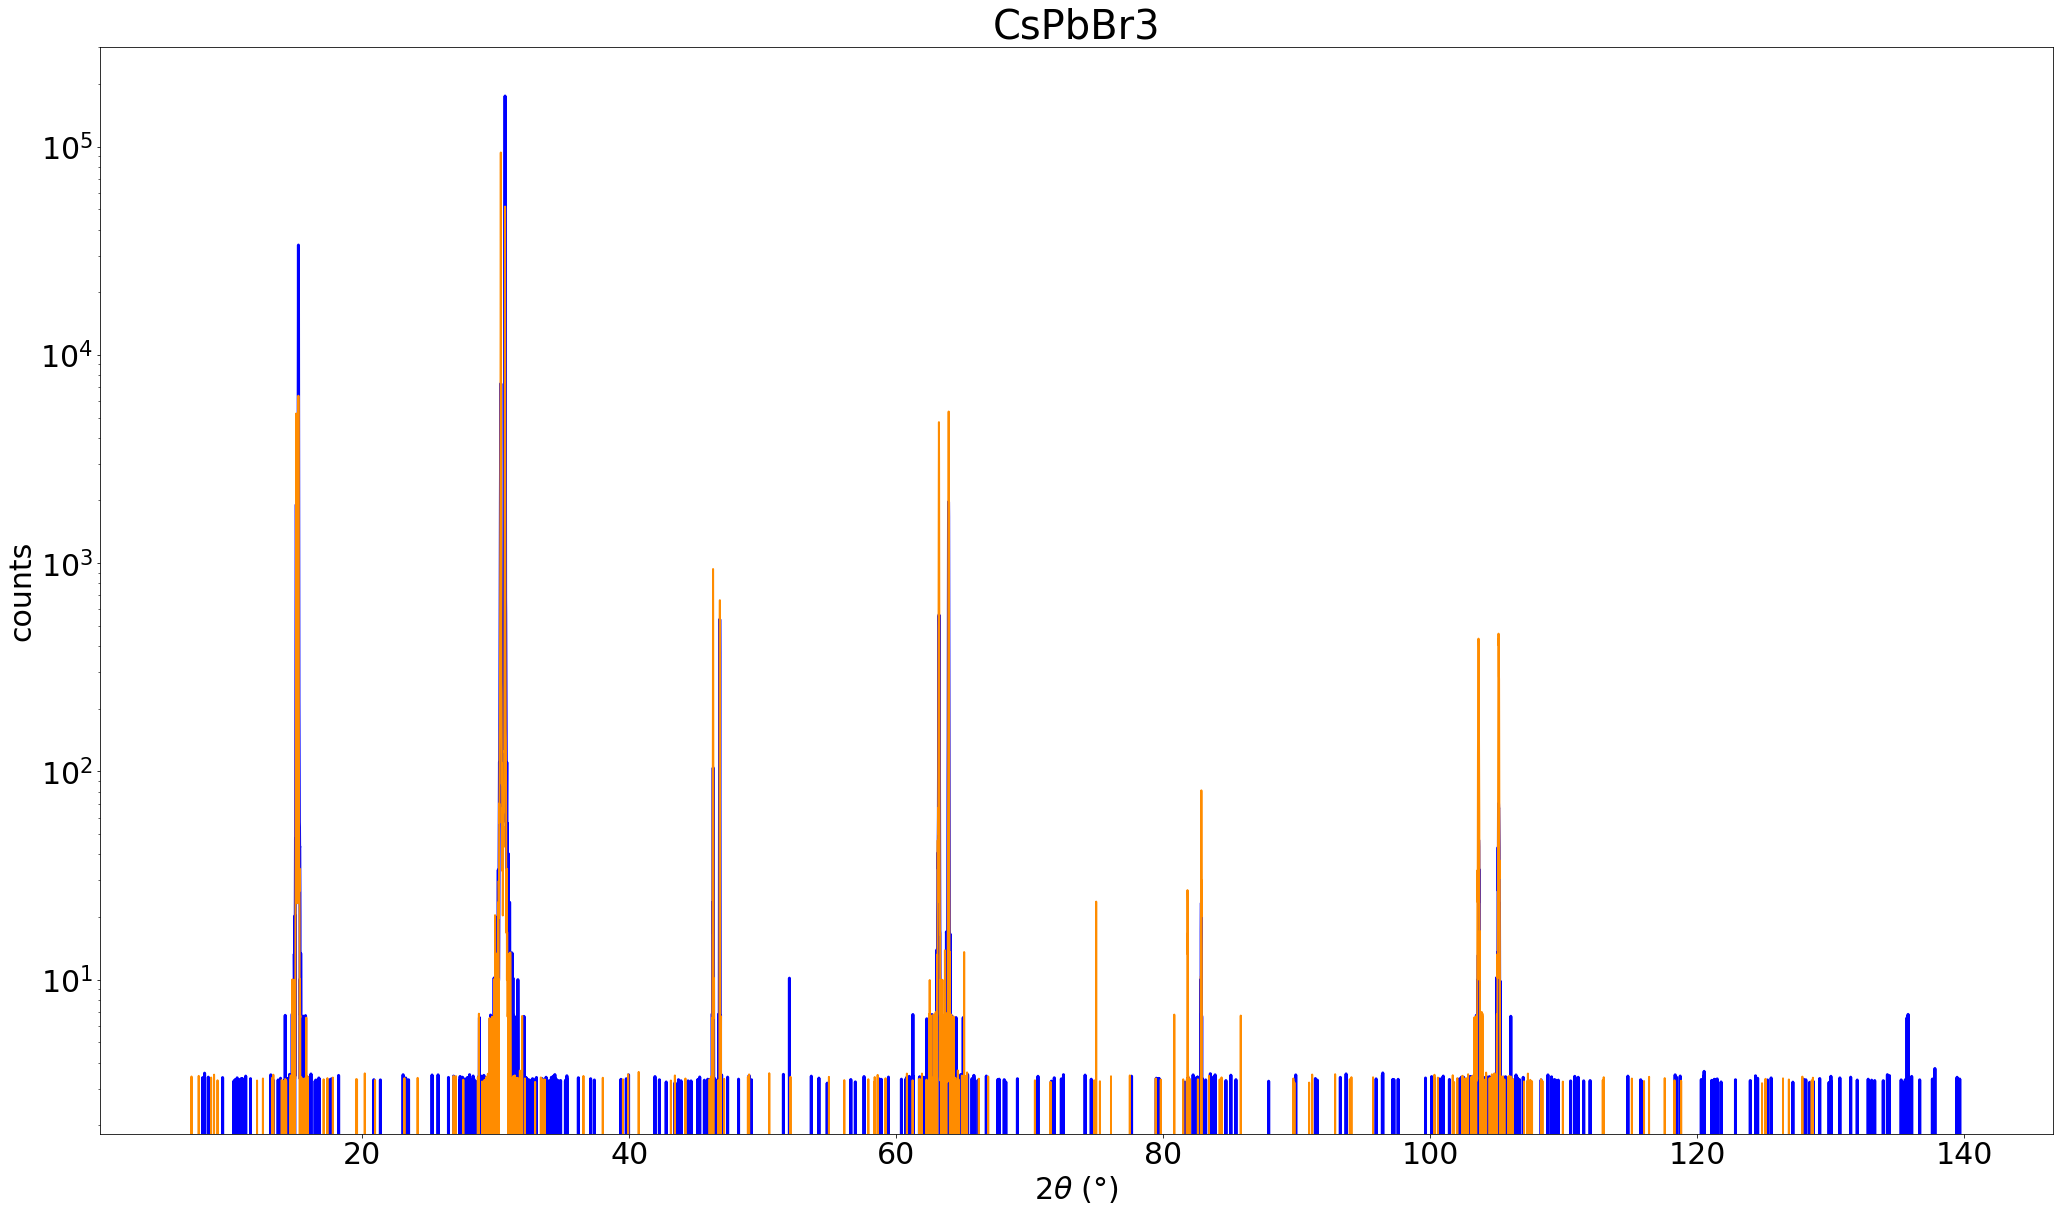

In [51]:
fig = plt.figure(figsize=(35,20))
ax1 = fig.add_subplot(111)
ax1.set_xlabel("2$\\theta$ ($\degree)$", fontsize=30)
ax1.tick_params(axis='x', labelsize=30)
ax1.set_ylabel("counts", fontsize=30)
ax1.tick_params(axis='y', labelsize=30)
ax1.set_title("CsPbBr3", fontsize=40)
ax1.set_yscale('log')

ax1.plot(df_CS104_A['2theta'], df_CS104_A['counts'], label='CS104-A', c='b', linewidth=3)
ax1.plot(df_CS106_A['2theta'], df_CS106_A['counts'], label='CS106-A', c='darkorange', linewidth=2)

for i, peak in enumerate(peaks_CS104_A):
    ax1.plot(peak_x.iloc[i], peak_y.iloc[i], 'ro', markersize=20)
ax1.set_xlim(8, 140)
ax1.legend(fontsize="30", frameon=False)

for i, peak in enumerate(peaks_CS106_A):
    ax1.plot(peak_x_CS106_A.iloc[i], peak_y_CS106_A.iloc[i], 'rP', markersize=20)

plt.show()